In [ ]:

! gdown --id 16rWmN4HmE06WJBmcKw__XP03uCyzTO6j

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16rWmN4HmE06WJBmcKw__XP03uCyzTO6j
To: /content/hr-analytics.zip
100% 302k/302k [00:00<00:00, 65.5MB/s]


In [ ]:

! unzip -o /content/hr-analytics.zip

Archive:  /content/hr-analytics.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/aug_train.csv')

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df['city_development_index_cut'] = pd.qcut(df['city_development_index'], 5, duplicates='drop')

In [ ]:
t = df.groupby('city_development_index_cut').agg({'target':'mean'})

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: xlabel='city_development_index_cut'>

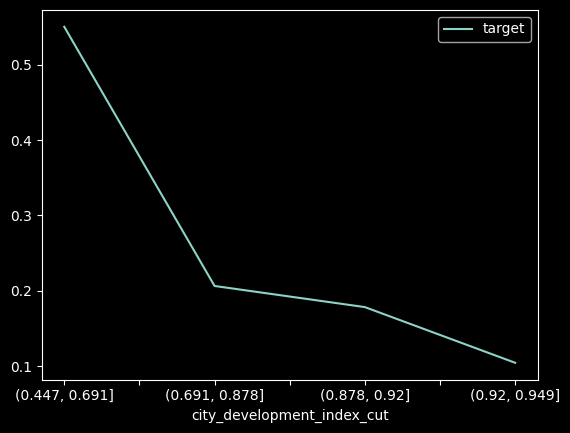

In [ ]:
t.plot()

In [ ]:
df['experience_int'] = df['experience'].replace({'>20':'999', '<1':'0', float('nan'):'-1'}).astype(int)

<Axes: xlabel='city_development_index', ylabel='experience_int'>

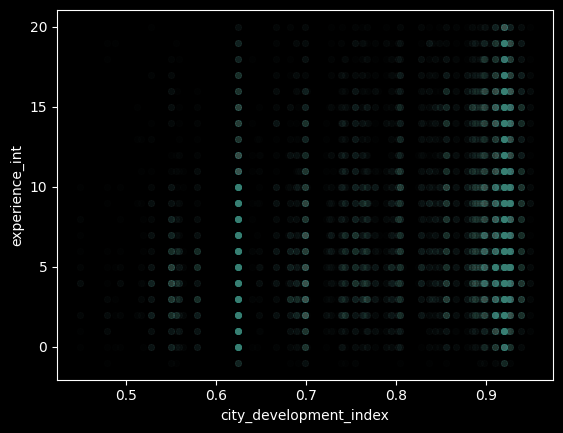

In [ ]:
df[df['experience_int']<999].plot(x='city_development_index', y='experience_int', kind='scatter', alpha=0.01)

In [ ]:
df['experience_int_group'] = pd.qcut(df['experience_int'], 5)

In [ ]:
t = df.groupby(['experience_int_group']).agg({'target':'mean'}).sort_values('target',ascending=False)

In [ ]:
t

,target
experience_int_group,
"(-1.001, 4.0]",0.358964
"(4.0, 6.0]",0.285336
"(6.0, 11.0]",0.239740
"(11.0, 18.0]",0.170561
"(18.0, 999.0]",0.157571


<Axes: xlabel='experience_int_group'>

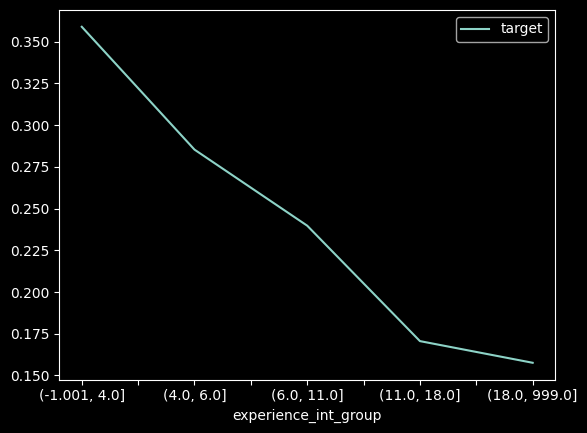

In [ ]:
t.plot()